# PARTE I: Familiarizandonos con la base EPH y limpieza

## EJERCICIO 2

A) A partir de ahora, cada grupo debe decidir trabajar con una región del país en específico y mantener dicha región en los próximos trabajos prácticos (ver variable REGION). Eliminen los datos de todas aquellas regiones que no se encuentren dentro de su región y unan ambos trimestres (2005 y 2025) en una sola base.


In [ ]:
#Montamos el Google Drive para poder usar los archivos en Colab.
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Abrimos la base de datos de la EPH 2025 desde Excel y mostramos sus primeras filas.
import pandas as pd

EPH_2025 = pd.read_excel("/content/drive/Shareddrives/CIENCIA DE DATOS COMPARTIDA/CIENCIA DE DATOS COMPARTIDA/TP1/usu_individual_T125.xlsx")

EPH_2025.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,2,1,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
1,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,3,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
2,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,4,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
3,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,5,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
4,TQRMNOUPQHLOLOCDEFKID00851757,2025,1,1,1,1,43,S,4,1294,...,0,0,0,0,3.0,3.0,3.0,NaN,3.0,3.0


In [ ]:
#Abrimos la base de datos de la EPH 2005 desde Stata y mostramos sus primeras filas.
EPH_2005 = pd.read_stata("/content/drive/Shareddrives/CIENCIA DE DATOS COMPARTIDA/CIENCIA DE DATOS COMPARTIDA/TP1/Individual_t105.dta")

EPH_2005.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,Sí,2005.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000


In [ ]:
# Vemos las regiones y cuántos casos hay por cada región en la base de EPH 2005.
EPH_2005['region'].value_counts() en la base de EPH 2005.
EPH_2005['region'].value_counts()

,count
region,
Pampeana,14651
Gran Buenos Aires,9484
NOA,9348
NEA,5453
Cuyo,4865
Patagónica,3229


In [ ]:
# Vemos las regiones y cuántos casos hay por cada región en la base de EPH 2025.
# Códigos de región:
# 01 = Gran Buenos Aires
# 40 = Noroeste
# 41 = Noreste
# 42 = Cuyo
# 43 = Pampeana
# 44 = Patagonia

EPH_2025['REGION'].value_counts()


,count
REGION,
43,13803
40,9742
1,7181
44,5359
41,4746
42,4594


In [ ]:
# Filtramos la base de EPH 2005 para quedarnos solo con los casos de la región Patagónica.
EPH_2005_patagonica = EPH_2005[EPH_2005["region"] == "Patagónica"]

# Verificamos que solo quede la región Patagónica.
EPH_2005_patagonica["region"].value_counts()

# Pasamos los nombres de las columnas a mayúsculas para mantener consistencia.
EPH_2005_patagonica.columns = EPH_2005_patagonica.columns.str.upper()

# Vemos la nueva base filtrada y con nombres de columnas en mayúsculas.
EPH_2005_patagonica

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
43801,125814,1.0,1.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,07,08,06,,08,05,0.0,0.0,0.0,00000
43802,125814,1.0,2.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,07,08,06,,08,05,0.0,0.0,0.0,00000
43803,125814,1.0,3.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,07,08,06,,08,05,0.0,0.0,0.0,00000
43804,125814,1.0,4.0,0.0,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,07,08,06,,08,05,0.0,0.0,0.0,00000
43805,125814,1.0,5.0,0.0,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,07,08,06,,08,05,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47025,288015,1.0,3.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47026,288015,1.0,4.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47027,288294,1.0,1.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000
47028,288294,1.0,2.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000


In [ ]:
# Filtramos la base de EPH 2025 para quedarnos solo con los casos de la región Patagonia (código 44).
EPH_2025_patagonica = EPH_2025[EPH_2025["REGION"] == 44]

# Verificamos que solo queden los casos de la región Patagonia.
EPH_2025_patagonica["REGION"].value_counts()


,count
REGION,
44,5359


In [ ]:
# Unimos las bases de EPH 2005 y EPH 2025 filtradas por la región Patagónica en una sola base.
EPH_patagonica = pd.concat([EPH_2005_patagonica, EPH_2025_patagonica], ignore_index=True)

# Mostramos las primeras filas de la base combinada (opcional).
# EPH_patagonica.head()

# Vemos la base completa combinada.
EPH_patagonica

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,125814,1.0,1.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125814,1.0,2.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125814,1.0,3.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125814,1.0,4.0,0.0,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125814,1.0,5.0,0.0,2005.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,1,1,2025.0,1,44,N,20,130.0,...,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0
8584,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,2,1,2025.0,1,44,N,20,130.0,...,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0
8585,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,3,1,2025.0,1,44,N,20,130.0,...,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0
8586,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,4,1,2025.0,1,44,N,20,130.0,...,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0


B) Asegúrense de que todas las variables tengan el formato correcto. Seleccione 15 variables de interés (entre las cuales tienen que estar: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF) y reporten en una figura de heatmap la cantidad de valores faltantes para cada año (NA, o NaN en Python) en una tabla por cada año. Comenten qué variables de las 15 que seleccionaron tienen más valores faltantes y qué año.


In [ ]:
print(EPH_patagonica.columns.tolist()) #Vemos los nombres de las distintas variables que hay en la base de datos, para elegir

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [ ]:
# Seleccionamos las 15 variables específicas de la base EPH 2025 Patagónica.
var_15 = ["V18_M", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO",
          "CAT_INAC", "IPCF", "PP08D1", "CH09", "PP04C", "CH12", "PP05C_2", "PP07C"]

EPH_2025_patagonica_2b = EPH_2025_patagonica[var_15]

# Vemos la nueva base con solo las variables seleccionadas.
EPH_2025_patagonica_2b

,V18_M,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PP08D1,CH09,PP04C,CH12,PP05C_2,PP07C
43,0,2,48,3,1.0,6,1,0,266666.67,800000.0,1,9.0,7,0.0,2.0
44,0,1,17,5,1.0,3,3,3,266666.67,NaN,1,NaN,4,NaN,NaN
45,0,1,9,5,1.0,1,4,3,266666.67,NaN,1,NaN,2,NaN,NaN
46,0,1,39,5,4.0,3,1,0,745000.00,0.0,1,1.0,4,2.0,0.0
47,0,2,36,5,1.0,4,1,0,1200000.00,1200000.0,1,11.0,4,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45295,0,2,55,1,3.0,4,3,4,87500.00,NaN,1,NaN,4,NaN,NaN
45296,0,1,49,1,3.0,1,1,0,87500.00,0.0,1,1.0,2,3.0,0.0
45297,0,1,35,5,3.0,1,3,6,87500.00,NaN,1,NaN,2,NaN,NaN
45326,0,2,26,5,3.0,3,1,0,87500.00,150000.0,1,0.0,4,0.0,0.0


In [ ]:
# Seleccionamos el mismo subconjunto de variables en la base EPH 2005 Patagónica.
EPH_2005_patagonica_2b = EPH_2005_patagonica[var_15]

# Vemos la nueva base con solo las variables seleccionadas.
EPH_2005_patagonica_2b

,V18_M,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PP08D1,CH09,PP04C,CH12,PP05C_2,PP07C
43801,0.0,Varón,46.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,480.0,2400.0,Sí,más de 500 personas,Secundario,0.0,"No (Incluye permanente, fijo, estable, de planta)"
43802,0.0,Mujer,32.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Ama de casa,480.0,0.0,Sí,0.0,Secundario,0.0,0.0
43803,0.0,Varón,14.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,Estudiante,480.0,0.0,Sí,0.0,EGB,0.0,0.0
43804,0.0,Varón,9.0,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Menor de 10 años,Estudiante,480.0,0.0,Sí,0.0,EGB,0.0,0.0
43805,0.0,Mujer,3.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,480.0,0.0,No,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47025,0.0,Mujer,16.0,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Estudiante,950.0,0.0,Sí,0.0,Polimodal,0.0,0.0
47026,0.0,Varón,12.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,Estudiante,950.0,0.0,Sí,0.0,EGB,0.0,0.0
47027,0.0,Varón,43.0,Unido,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,1356.0,2387.0,Sí,de 41 a 100 personas,Secundario,0.0,"No (Incluye permanente, fijo, estable, de planta)"
47028,0.0,Mujer,26.0,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,0.0,1356.0,1681.0,Sí,de 101 a 200 personas,Secundario,0.0,"No (Incluye permanente, fijo, estable, de planta)"


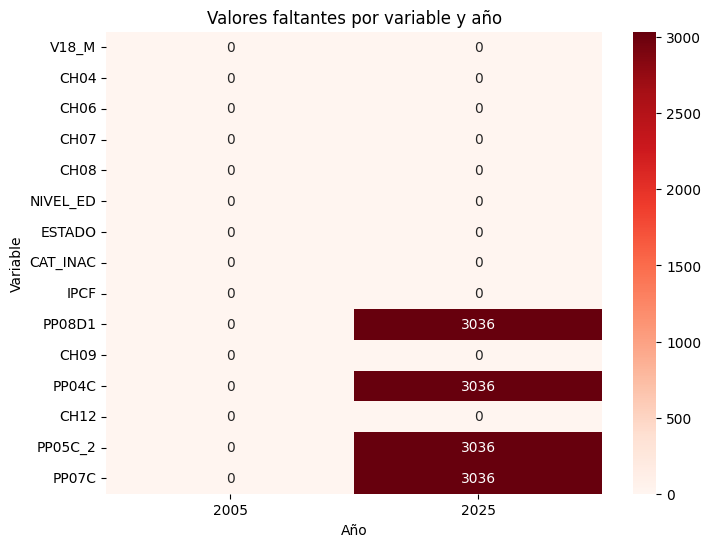

In [ ]:
# Importamos librerías para visualización.
import seaborn as sns
import matplotlib.pyplot as plt


# Calculamos la cantidad de valores faltantes por variable en EPH 2005 y EPH 2025.
faltantes = pd.DataFrame({
    "2005": EPH_2005_patagonica_2b[var_15].isna().sum(),
    "2025": EPH_2025_patagonica_2b[var_15].isna().sum()
})

# Creamos un heatmap para visualizar los valores faltantes por variable y año.
plt.figure(figsize=(8,6))
sns.heatmap(faltantes, annot=True, fmt="d", cmap="Reds")
plt.title("Valores faltantes por variable y año")
plt.xlabel("Año")
plt.ylabel("Variable")
plt.show(

C) Corregir variables si notan valores sin sentido (como ingresos negativos) de acuerdo a la documentación de la EPH (puede ser una codificación de no respuesta de los individuos) y eliminen estos valores extraños de sus 15 variables de interés. Comenten brevemente en el reporte dicho proceso de limpieza.

In [ ]:
# Recorremos cada variable de la lista var_15 y mostramos la frecuencia de sus valores en EPH 2005 Patagónica.
# Esto sirve para revisar posibles valores extraños (por ejemplo, ingresos negativos) y compararlos con el diccionario de variables.
# Incluye los valores faltantes (NaN) para tener un panorama completo.
# Observación: algunas variables pueden mostrar un valor 0.0 que indica que no corresponde respuesta
# para ese sujeto (por ejemplo, si está desocupado, no tendrá datos en condiciones de trabajo).
for col in var_15:
    print(f"\nVariable: {col}")
    print(EPH_2005_patagonica_2b[col].value_counts(dropna=False))


Variable: V18_M
V18_M
0.0       3227
3100.0       1
250.0        1
Name: count, dtype: int64

Variable: CH04
CH04
Mujer    1654
Varón    1575
Name: count, dtype: int64

Variable: CH06
CH06
17.0             86
15.0             78
13.0             74
10.0             73
12.0             70
                 ..
93.0              0
95.0              0
96.0              0
97.0              0
98 y más años     0
Name: count, Length: 99, dtype: int64

Variable: CH07
CH07
Soltero                  1678
Casado                    911
Unido                     381
Separado o divorciado     152
Viudo                     107
Ns./Nr.                     0
Name: count, dtype: int64

Variable: CH08
CH08
Obra social (incluye PAMI)                                      2205
No paga ni le descuentan                                         859
Planes y seguros públicos                                        111
Mutual/Prepaga/Servicio de emergencia                             37
Obra social y mutual/prepaga

# PARTE II: Primer Análisis Exploratorio

## EJERCICIO 3

Realicen un gráfico de barras mostrando la composición por sexo para 2005 y 2025 en su región. Comenten los resultados.


/tmp/ipython-input-234905072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2005_patagonica["CH04"] = EPH_2005_patagonica["CH04"].replace({1: "Varón", 2: "Mujer"})
/tmp/ipython-input-234905072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2025_patagonica["CH04"] = EPH_2025_patagonica["CH04"].replace({1: "Varón", 2: "Mujer"})


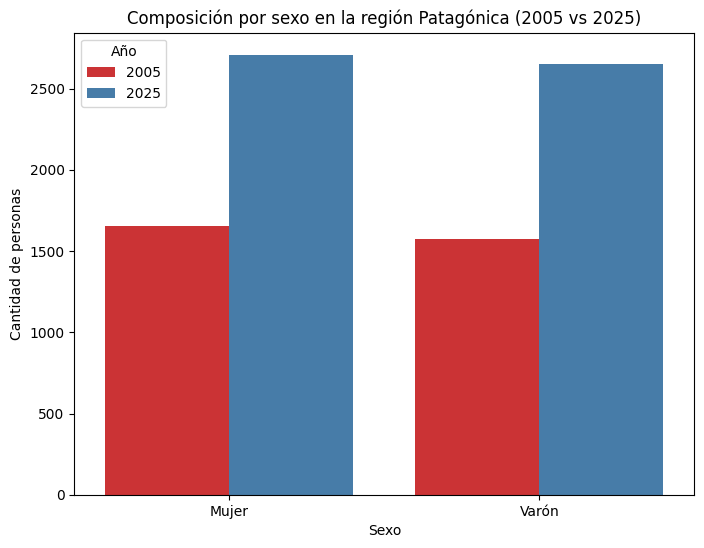

In [ ]:
# Reemplazamos los códigos de sexo por etiquetas más claras en ambas bases.
# 1 = Varón, 2 = Mujer
EPH_2005_patagonica["CH04"] = EPH_2005_patagonica["CH04"].replace({1: "Varón", 2: "Mujer"})
EPH_2025_patagonica["CH04"] = EPH_2025_patagonica["CH04"].replace({1: "Varón", 2: "Mujer"})

# Creamos DataFrames con las frecuencias por sexo para cada año.
sexo_2005 = EPH_2005_patagonica["CH04"].value_counts().reset_index()
sexo_2005.columns = ["Sexo", "Cantidad"]
sexo_2005["Año"] = 2005

sexo_2025 = EPH_2025_patagonica["CH04"].value_counts().reset_index()
sexo_2025.columns = ["Sexo", "Cantidad"]
sexo_2025["Año"] = 2025

# Unimos los datos de ambos años en un solo DataFrame.
sexo_total = pd.concat([sexo_2005, sexo_2025])

# Graficamos la composición por sexo en la región Patagónica comparando 2005 y 2025.
plt.figure(figsize=(8,6))
sns.barplot(data=sexo_total, x="Sexo", y="Cantidad", hue="Año", palette="Set1")
plt.title("Composición por sexo en la región Patagónica (2005 vs 2025)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de personas")
plt.show()
```


## EJERCICIO 4

Realicen una matriz de correlación para 2005 y 2025 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Crear las variables dicotómicas binarias necesarias (variables dummies) y renombrar dichas variables para que las etiquetas tengan sentido en el gráfico de correlación. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlación. Comenten los resultados.

In [ ]:
# Seleccionamos las variables de interés para crear la matriz de correlación en EPH 2025 Patagónica.
var_4 = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]

EPH_2025_patagonica_4 = EPH_2025_patagonica_2b[var_4]

# Vemos la nueva base con las variables seleccionadas.
EPH_2025_patagonica_4

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF
43,2,48,3,1.0,6,1,0,266666.67
44,1,17,5,1.0,3,3,3,266666.67
45,1,9,5,1.0,1,4,3,266666.67
46,1,39,5,4.0,3,1,0,745000.00
47,2,36,5,1.0,4,1,0,1200000.00
...,...,...,...,...,...,...,...,...
45295,2,55,1,3.0,4,3,4,87500.00
45296,1,49,1,3.0,1,1,0,87500.00
45297,1,35,5,3.0,1,3,6,87500.00
45326,2,26,5,3.0,3,1,0,87500.00


In [ ]:
# Seleccionamos las mismas variables de interés para crear la matriz de correlación en EPH 2005 Patagónica.
EPH_2005_patagonica_4 = EPH_2005_patagonica_2b[var_4]

# Vemos la nueva base con las variables seleccionadas.
EPH_2005_patagonica_4

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF
43801,Varón,46.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,480.0
43802,Mujer,32.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Ama de casa,480.0
43803,Varón,14.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,Estudiante,480.0
43804,Varón,9.0,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Menor de 10 años,Estudiante,480.0
43805,Mujer,3.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,480.0
...,...,...,...,...,...,...,...,...
47025,Mujer,16.0,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Estudiante,950.0
47026,Varón,12.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,Estudiante,950.0
47027,Varón,43.0,Unido,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,1356.0
47028,Mujer,26.0,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,0.0,1356.0


Ahora vamos a pasar crear las variables dicotómicas binarias necesarias

In [ ]:
# Creamos variables dummies para la variable Sexo en EPH 2025 Patagónica.
# 1 = Varón, 2 = Mujer
sexo_2025 = pd.get_dummies(EPH_2025_patagonica_4["CH04"], prefix="Sexo").astype(int)

# Renombramos las columnas para que tengan sentido en el gráfico.
sexo_2025 = sexo_2025.rename(columns={"Sexo_1": "Varón", "Sexo_2": "Mujer"})

# Renombramos la columna original para mantener consistencia.
EPH_2025_patagonica_4 = EPH_2025_patagonica_4.rename(columns={"CH04": "Sexo"})

# Mostramos las variables dummies creadas.
sexo_2025

,Varón,Mujer
43,0,1
44,1,0
45,1,0
46,1,0
47,0,1
...,...,...
45295,0,1
45296,1,0
45297,1,0
45326,0,1


In [ ]:
# Creamos variables dummies para la variable Sexo en EPH 2005 Patagónica.
# 1 = Varón, 2 = Mujer
sexo_2005 = pd.get_dummies(EPH_2005_patagonica_4["CH04"], prefix="Sexo").astype(int)

# Renombramos las columnas para que tengan sentido en el gráfico.
sexo_2005 = sexo_2005.rename(columns={"Sexo_1": "Varón", "Sexo_2": "Mujer"})

# Renombramos la columna original para mantener consistencia.
EPH_2005_patagonica_4 = EPH_2005_patagonica_4.rename(columns={"CH04": "Sexo"})

# Mostramos las variables dummies creadas.
sexo_2005

,Sexo_Varón,Sexo_Mujer
43801,1,0
43802,0,1
43803,1,0
43804,1,0
43805,0,1
...,...,...
47025,0,1
47026,1,0
47027,1,0
47028,0,1


In [ ]:
#Renombramos las variables:
#Edad - 2025

EPH_2025_patagonica_4 = EPH_2025_patagonica_4.rename(columns={"CH06": "Edad"})

In [ ]:
#Edad - 2005

EPH_2005_patagonica_4 = EPH_2005_patagonica_4.rename(columns={"CH06": "Edad"})

In [ ]:
#Estado civil - 2025

EPH_2025_patagonica_4 = EPH_2025_patagonica_4.rename(columns={"CH07": "Estado civil"})

In [ ]:
#Estado civil - 2005

EPH_2005_patagonica_4 = EPH_2005_patagonica_4.rename(columns={"CH07": "Estado civil"})

In [ ]:
#Cobertura medica - 2025

EPH_2025_patagonica_4 = EPH_2025_patagonica_4.rename(columns={"CH08": "Cobertura medica"})

In [ ]:
#Cobertura medica - 2005

EPH_2005_patagonica_4 = EPH_2005_patagonica_4.rename(columns={"CH08": "Cobertura medica"})

In [ ]:
#Condición de actividad - 2025

EPH_2025_patagonica_4 = EPH_2025_patagonica_4.rename(columns={"ESTADO": "Condición de actividad"})

In [ ]:
#Condición de actividad - 2005

EPH_2005_patagonica_4 = EPH_2005_patagonica_4.rename(columns={"ESTADO": "Condición de actividad"})

In [ ]:
#Revisamos
EPH_2025_patagonica_4

,Sexo,Edad,Estado civil,Cobertura medica,NIVEL_ED,Condición de actividad,CAT_INAC,IPCF
43,2,48,3,1.0,6,1,0,266666.67
44,1,17,5,1.0,3,3,3,266666.67
45,1,9,5,1.0,1,4,3,266666.67
46,1,39,5,4.0,3,1,0,745000.00
47,2,36,5,1.0,4,1,0,1200000.00
...,...,...,...,...,...,...,...,...
45295,2,55,1,3.0,4,3,4,87500.00
45296,1,49,1,3.0,1,1,0,87500.00
45297,1,35,5,3.0,1,3,6,87500.00
45326,2,26,5,3.0,3,1,0,87500.00


In [ ]:
#Revisamos
EPH_2005_patagonica_4

,Sexo,Edad,Estado civil,Cobertura medica,NIVEL_ED,Condición de actividad,CAT_INAC,IPCF
43801,Varón,46.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,480.0
43802,Mujer,32.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Ama de casa,480.0
43803,Varón,14.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,Estudiante,480.0
43804,Varón,9.0,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Menor de 10 años,Estudiante,480.0
43805,Mujer,3.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,480.0
...,...,...,...,...,...,...,...,...
47025,Mujer,16.0,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Estudiante,950.0
47026,Varón,12.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,Estudiante,950.0
47027,Varón,43.0,Unido,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,1356.0
47028,Mujer,26.0,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,0.0,1356.0


<Axes: >

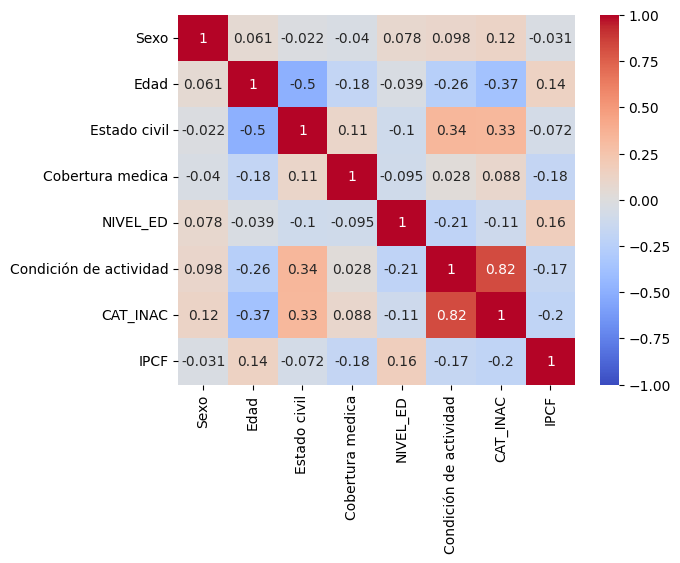

In [ ]:
# Importamos librerías necesarias para visualización (si no estaban importadas previamente).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la matriz de correlación para EPH 2025 Patagónica y la visualizamos con un heatmap.
# Los valores van de -1 a +1, se muestran los números en cada celda y usamos la paleta "coolwarm".
sns.heatmap(EPH_2025_patagonica_4.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")


In [ ]:
# Renombramos y codificamos la variable "Estado civil" en EPH 2005 Patagónica.
# Convertimos los valores a minúsculas y eliminamos espacios para estandarizar,
# luego los mapeamos a códigos numéricos:
# 1 = Unido, 2 = Casado, 3 = Separado o Divorciado, 4 = Viudo, 5 = Soltero
# Los valores "ns./nr." se reemplazan por NaN.

import numpy as np

EPH_2005_patagonica_4["Estado civil"] = (
    EPH_2005_patagonica_4["Estado civil"]
      .astype(str).str.strip().str.lower()
      .map({
          "unido": 1.0,
          "casado": 2.0,
          "separado o divorciado": 3.0,
          "viudo": 4.0,
          "soltero": 5.0,
          "ns./nr.": np.nan  # opcional
      })
      .astype(float)
)


In [ ]:
# Codificamos la variable "Sexo" en EPH 2005 Patagónica.
# Convertimos los valores a minúsculas y eliminamos espacios para estandarizar,
# luego los mapeamos a códigos numéricos:
# 1 = Varón, 2 = Mujer
import numpy as np

EPH_2005_patagonica_4["Sexo"] = (
    EPH_2005_patagonica_4["Sexo"]
      .astype(str).str.strip().str.lower()
      .map({
          "varón": 1.0,
          "mujer": 2.0,
      })
      .astype(float)
)


In [ ]:
# Codificamos la variable "Cobertura medica" en EPH 2005 Patagónica.
# Convertimos los valores a minúsculas y eliminamos espacios para estandarizar,
# luego los mapeamos a códigos numéricos según el tipo de cobertura:
# 1 = Obra social (incluye PAMI)
# 2 = Mutual/prepaga/servicio de emergencia
# 3 = Planes y seguros públicos
# 4 = No paga ni le descuentan
# 9 = Ns./Nr.
# 12, 13, 23, 123 = combinaciones de coberturas múltiples (opcional)
import numpy as np

EPH_2005_patagonica_4["Cobertura medica"] = (
    EPH_2005_patagonica_4["Cobertura medica"]
      .astype(str).str.strip().str.lower()
      .map({
          "obra social (incluye pami)": 1.0,
          "mutual/prepaga/servicio de emergencia": 2.0,
          "planes y seguros publicos": 3.0,
          "no paga ni le descuentan": 4.0,
          "ns./nr.": 9.0,
          "obra social y mutual/prepaga/servicio de emergencia": 12.0,
          "obra social y planes y seguros publicos": 13.0,
          "mutual/prepaga/servicio de emergencia/planes y seguros publi": 23.0,
          "obra social, mutual/prepaga/servicio de emergencia y planes": 123.0,
      })
      .astype(float)
)


In [ ]:
# Codificamos la variable "NIVEL_ED" (nivel educativo) en EPH 2005 Patagónica.
# Convertimos los valores a minúsculas y eliminamos espacios para estandarizar,
# luego los mapeamos a códigos numéricos según el nivel educativo:
# 1 = Primaria incompleta (incluye educación especial)
# 2 = Primaria completa
# 3 = Secundaria incompleta
# 4 = Secundaria completa
# 5 = Superior universitaria incompleta
# 6 = Superior universitaria completa
# 7 = Sin instrucción
# 9 = Ns./Nr. (opcional)
import numpy as np

EPH_2005_patagonica_4["NIVEL_ED"] = (
    EPH_2005_patagonica_4["NIVEL_ED"]
      .astype(str).str.strip().str.lower()
      .map({
          "primaria incompleta (incluye educación especial)": 1.0,
          "primaria completa ": 2.0,
          "secundaria incompleta": 3.0,
          "secundaria completa": 4.0,
          "superior universitaria incompleta": 5.0,
          "superior universitaria completa": 6.0,
          "sin instruccion": 7.0,
          "ns./nr.": 9.0
      })
      .astype(float)
)


In [ ]:
# Codificamos la variable "Condición de actividad" en EPH 2005 Patagónica.
# Convertimos los valores a minúsculas y eliminamos espacios para estandarizar,
# luego los mapeamos a códigos numéricos según la condición del individuo:
# 0 = Entrevista no realizada / no respuesta
# 1 = Ocupado
# 2 = Desocupado
# 3 = Inactivo
# 4 = Menor de 10 años (opcional)
import numpy as np

EPH_2005_patagonica_4["Condición de actividad"] = (
    EPH_2005_patagonica_4["Condición de actividad"]
      .astype(str).str.strip().str.lower()
      .map({
          "entrevista individual no realizada (no respuesta al cuestion": 0.0,
          "ocupado ": 1.0,
          "desocupado": 2.0,
          "inactivo": 3.0,
          "menor de 10 años": 4.0,
      })
      .astype(float)
)


In [ ]:
# Codificamos la variable "CAT_INAC" (categoría de inactividad) en EPH 2005 Patagónica.
# Convertimos los valores a minúsculas y eliminamos espacios para estandarizar,
# luego los mapeamos a códigos numéricos según la categoría:
# 1 = Jubilado/pensionado
# 2 = Rentista
# 3 = Estudiante
# 4 = Ama de casa
# 5 = Menor de 6 años / Discapacitado / Otros
import numpy as np

EPH_2005_patagonica_4["CAT_INAC"] = (
    EPH_2005_patagonica_4["CAT_INAC"]
      .astype(str).str.strip().str.lower()
      .map({
          "jubilado/pensionado": 1.0,
          "rentista": 2.0,
          "estudiante": 3.0,
          "ama de casa": 4.0,
          "menor de 6 años": 5.0,
          "discapacitado": 5.0,
          "otros": 5.0,
      })
      .astype(float)
)


In [ ]:
# Codificamos la variable "Edad" en EPH 2005 Patagónica.
# Primero convertimos todo a texto para poder procesarlo.
EPH_2005_patagonica_4["Edad"] = EPH_2005_patagonica_4["Edad"].astype(str)

# Reemplazamos el valor especial "Menos de 1 año" por 0.
for i, val in enumerate(EPH_2005_patagonica_4["Edad"]):
    if str(val).strip().lower() == "menos de 1 año":
        EPH_2005_patagonica_4.at[i, "Edad"] = 0

# Convertimos la columna a numérica, convirtiendo valores no numéricos en NaN.
EPH_2005_patagonica_4["Edad"] = pd.to_numeric(
    EPH_2005_patagonica_4["Edad"], errors="coerce"
)


<Axes: >

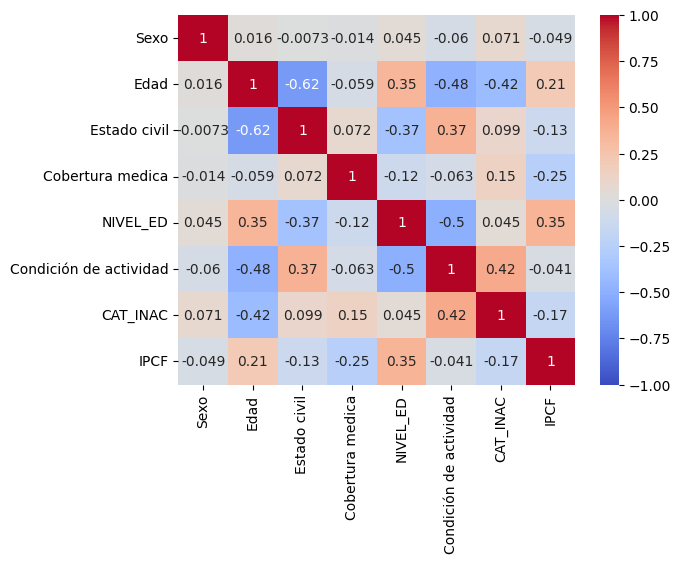

In [ ]:
# Importamos librerías necesarias para visualización (si no estaban importadas previamente).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la matriz de correlación para EPH 2005 Patagónica y la visualizamos con un heatmap.
# Los valores van de -1 a +1, se muestran los números en cada celda y usamos la paleta "coolwarm".
sns.heatmap(EPH_2005_patagonica_4.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")


# Parte III: Conociendo a los pobres y no pobres

## EJERCICIO 5

Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su ingreso total familiar (ITF). Las observaciones con ITF=0 guárdenlas en una base bajo el nombre norespondieron.


In [ ]:
# Revisamos cuántas personas respondieron o no la variable ITF en la base combinada Patagónica.

var_1 = ["ITF"]

# Mostramos la frecuencia de valores para la variable ITF, incluyendo los NaN.
for col in var_1:
    print(f"\nVariable: {col}")
    print(EPH_patagonica[col].value_counts(dropna=False))


Variable: ITF
ITF
0.0          1225
1500000.0     136
2000000.0     132
1000000.0     108
800000.0      102
             ... 
2270.0          1
2120.0          1
1769.0          1
164.0           1
830.0           1
Name: count, Length: 784, dtype: int64


In [ ]:
# Creamos dos bases distintas según la respuesta a la pregunta sobre ingreso total familiar (ITF):
# - "respondieron": observaciones con ITF > 0
# - "norespondieron": observaciones con ITF = 0 o NaN

respondieron = []
norespondieron = []

for i, val in enumerate(EPH_patagonica["ITF"]):
    # Si es NaN → no respondió
    if pd.isna(val):
        norespondieron.append(EPH_patagonica.iloc[i])
    # Si respondió pero puso 0 → también lo guardamos en norespondieron
    elif val == 0:
        norespondieron.append(EPH_patagonica.iloc[i])
    # Si respondió (>0) → va a respondieron
    else:
        respondieron.append(EPH_patagonica.iloc[i])

# Convertimos las listas en DataFrames
respondieron = pd.DataFrame(respondieron)
norespondieron = pd.DataFrame(norespondieron)

# Mostramos la cantidad de observaciones en cada base
print("Cantidad respondieron:", len(respondieron))
print("Cantidad norespondieron:", len(norespondieron))

Cantidad respondieron: 7363
Cantidad norespondieron: 1225


## EJERCICIO 6

Utilizando el archivo tabla_adulto_equiv.xlsx, agreguen a su base de datos una columna llamada adulto_equiv que contenga los valores de adulto equivalente de cada persona según su sexo y edad (por ejemplo, a un varón de 2 años le corresponde 0.46). Finalmente, con el comando groupby sumen esta nueva columna para las personas que pertenecen a un mismo hogar y guarden ese dato en una columna llamada ad_equiv_hogar.


In [ ]:
# Definimos la función que devuelve el valor de adulto equivalente según la edad y el sexo.
# Sexo: 1 = varón, 2 = mujer
def adulto_equiv(edad, sexo):
    if edad < 1:
        return 0.35
    elif edad == 1:
        return 0.37
    elif edad == 2:
        return 0.46
    elif edad == 3:
        return 0.51
    elif edad == 4:
        return 0.55
    elif edad == 5:
        return 0.60
    elif edad == 6:
        return 0.64
    elif edad == 7:
        return 0.66
    elif edad == 8:
        return 0.68
    elif edad == 9:
        return 0.69
    elif edad == 10:
        return 0.70 if sexo == 2 else 0.79
    elif edad == 11:
        return 0.72 if sexo == 2 else 0.82
    elif edad == 12:
        return 0.74 if sexo == 2 else 0.85
    elif edad == 13:
        return 0.76 if sexo == 2 else 0.90
    elif edad == 14:
        return 0.76 if sexo == 2 else 0.96
    elif edad == 15:
        return 0.77 if sexo == 2 else 1.00
    elif edad == 16:
        return 0.77 if sexo == 2 else 1.03
    elif edad == 17:
        return 0.77 if sexo == 2 else 1.04
    elif 18 <= edad <= 29:
        return 0.76 if sexo == 2 else 1.02
    elif 30 <= edad <= 45:
        return 0.77 if sexo == 2 else 1.00
    elif 46 <= edad <= 60:
        return 0.76 if sexo == 2 else 1.00
    elif 61 <= edad <= 75:
        return 0.67 if sexo == 2 else 0.83
    else:  # más de 75
        return 0.63 if sexo == 2 else 0.74

# Creamos una columna nueva "adulto_equiv" aplicando la función a cada fila.
EPH_2025_patagonica["adulto_equiv"] = EPH_2025_patagonica.apply(
    lambda row: adulto_equiv(row["CH06"], row["CH04"]), axis=1
)

# Mostramos un ejemplo de la columna calculada para la fila 45.
EPH_2025_patagonica.loc[45, ["CH06", "CH04", "adulto_equiv"]]


/tmp/ipython-input-1703446860.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2025_patagonica["adulto_equiv"] = EPH_2025_patagonica.apply(


,45
CH06,9
CH04,Varón
adulto_equiv,0.69


In [ ]:
# Convertimos la columna "CH06" (edad) a numérica, porque estaba en formato string.
EPH_2005_patagonica["CH06"] = pd.to_numeric(EPH_2005_patagonica["CH06"], errors="coerce")

# Definimos la función que devuelve el valor de adulto equivalente según edad y sexo para EPH 2005.
# Sexo: "Varon" o "Mujer"
def adulto_equiv_2005(edad, sexo):
    if edad < 1:
        return 0.35
    elif edad == 1:
        return 0.37
    elif edad == 2:
        return 0.46
    elif edad == 3:
        return 0.51
    elif edad == 4:
        return 0.55
    elif edad == 5:
        return 0.60
    elif edad == 6:
        return 0.64
    elif edad == 7:
        return 0.66
    elif edad == 8:
        return 0.68
    elif edad == 9:
        return 0.69
    elif edad == 10:
        return 0.70 if sexo == "Mujer" else 0.79
    elif edad == 11:
        return 0.72 if sexo == "Mujer" else 0.82
    elif edad == 12:
        return 0.74 if sexo == "Mujer" else 0.85
    elif edad == 13:
        return 0.76 if sexo == "Mujer" else 0.90
    elif edad == 14:
        return 0.76 if sexo == "Mujer" else 0.96
    elif edad == 15:
        return 0.77 if sexo == "Mujer" else 1.00
    elif edad == 16:
        return 0.77 if sexo == "Mujer" else 1.03
    elif edad == 17:
        return 0.77 if sexo == "Mujer" else 1.04
    elif 18 <= edad <= 29:
        return 0.76 if sexo == "Mujer" else 1.02
    elif 30 <= edad <= 45:
        return 0.77 if sexo == "Mujer" else 1.00
    elif 46 <= edad <= 60:
        return 0.76 if sexo == "Mujer" else 1.00
    elif 61 <= edad <= 75:
        return 0.67 if sexo == "Mujer" else 0.83
    else:  # más de 75
        return 0.63 if sexo == "Mujer" else 0.74

# Creamos la columna "adulto_equiv" aplicando la función a cada fila.
EPH_2005_patagonica["adulto_equiv"] = EPH_2005_patagonica.apply(
    lambda row: adulto_equiv_2005(row["CH06"], row["CH04"]), axis=1
)

# Mostramos un ejemplo de la columna calculada para la fila 43804.
EPH_2005_patagonica.loc[43804, ["CH06", "CH04", "adulto_equiv"]]



/tmp/ipython-input-2087191154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2005_patagonica["CH06"] = pd.to_numeric(EPH_2005_patagonica["CH06"], errors="coerce") #Convierto el valor de la columna edad a numperico porque estaba en string.
/tmp/ipython-input-2087191154.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2005_patagonica["adulto_equiv"] = EPH_2005_patagonica.apply(


,43804
CH06,9.0
CH04,Varón
adulto_equiv,0.69


In [ ]:
# Calculamos el total de adultos equivalentes por hogar en EPH 2025 Patagónica.
# Agrupamos por hogar (CODUSU y NRO_HOGAR) y sumamos los valores de la columna "adulto_equiv".
# Usamos transform("sum") para que cada fila del hogar tenga el mismo total.
EPH_2025_patagonica["ad_equiv_hogar"] = (
    EPH_2025_patagonica
    .groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"]
    .transform("sum")
)

# Mostramos las primeras 15 filas con las columnas relevantes para verificar el cálculo.
EPH_2025_patagonica[["CODUSU", "NRO_HOGAR", "CH06", "CH04", "adulto_equiv", "ad_equiv_hogar"]].head(15)


/tmp/ipython-input-2991198670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2025_patagonica["ad_equiv_hogar"] = (


,CODUSU,NRO_HOGAR,CH06,CH04,adulto_equiv,ad_equiv_hogar
43,TQRMNOQXRHMMKRCDEIHJF00877717,1,48,Mujer,1.00,2.73
44,TQRMNOQXRHMMKRCDEIHJF00877717,1,17,Varón,1.04,2.73
45,TQRMNOQXRHMMKRCDEIHJF00877717,1,9,Varón,0.69,2.73
46,TQRMNPQTPHLOKSCDEIHJF00854739,1,39,Varón,1.00,1.00
47,TQRMNOPYQHLKKTCDEIHJF00854706,2,36,Mujer,1.00,1.00
48,TQRMNOPQTHJOKUCDEIHJF00875922,1,30,Varón,1.00,1.00
49,TQRMNOTRTHKKKMCDEIHJF00860797,1,54,Mujer,1.00,1.00
50,TQRMNOSWTHLMKRCDEIHJF00860958,1,29,Mujer,1.02,1.02
70,TQRMNOPXYHLOKUCDEFPCH00852546,1,4,Varón,0.55,4.99
71,TQRMNOPVUHMMLMCDEFPCH00877770,1,41,Mujer,1.00,2.87


In [ ]:
# Calculamos el total de adultos equivalentes por hogar en EPH 2005 Patagónica.
# Agrupamos por hogar (CODUSU y NRO_HOGAR) y sumamos los valores de la columna "adulto_equiv".
# Usamos transform("sum") para que cada fila del hogar tenga el mismo total.
EPH_2005_patagonica["ad_equiv_hogar"] = (
    EPH_2005_patagonica
    .groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"]
    .transform("sum")
)

# Mostramos las primeras 15 filas con las columnas relevantes para verificar el cálculo.
EPH_2005_patagonica[["CODUSU", "NRO_HOGAR", "CH06", "CH04", "adulto_equiv", "ad_equiv_hogar"]].head(15)


/tmp/ipython-input-71573064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2005_patagonica["ad_equiv_hogar"] = (


,CODUSU,NRO_HOGAR,CH06,CH04,adulto_equiv,ad_equiv_hogar
43801,125814,1.0,46.0,Varón,1.00,3.93
43802,125814,1.0,32.0,Mujer,0.77,3.93
43803,125814,1.0,14.0,Varón,0.96,3.93
43804,125814,1.0,9.0,Varón,0.69,3.93
43805,125814,1.0,3.0,Mujer,0.51,3.93
43806,125969,1.0,62.0,Varón,0.83,1.59
43807,125969,1.0,59.0,Mujer,0.76,1.59
43808,126039,1.0,75.0,Mujer,0.67,0.67
43809,126757,1.0,39.0,Varón,1.00,4.48
43810,126757,1.0,36.0,Mujer,0.77,4.48


## EJERCICIO 7

Sabiendo que la Canasta Básica Total para un adulto equivalente en el primer trimestre de 2025 es aproximadamente $365.177, agreguen a la base respondieron una columna llamada ingreso_necesario que sea el producto de este valor por ad_equiv_hogar. Para el primer trimestre de 2005 la Canasta Básica Total para un adulto equivalente era aproximadamente $205,07. Note que este es el valor mínimo que necesita ese hogar para no ser pobre.

In [ ]:
# Ejercicio 7: cálculo del ingreso necesario según la Canasta Básica Total (CBT).

# Definimos la CBT de referencia para el primer trimestre de 2025.
CBT_2025 = 365177

# Creamos la columna "ingreso_necesario" multiplicando la CBT por los adultos equivalentes del hogar.
EPH_2025_patagonica["ingreso_necesario"] = (
    EPH_2025_patagonica["ad_equiv_hogar"] * CBT_2025
)

# Mostramos las primeras 10 filas únicas con las columnas relevantes para verificar el cálculo.
EPH_2025_patagonica[["CODUSU", "NRO_HOGAR", "ad_equiv_hogar", "ingreso_necesario"]].drop_duplicates().head(10)


/tmp/ipython-input-2231433427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2025_patagonica["ingreso_necesario"] = (


,CODUSU,NRO_HOGAR,ad_equiv_hogar,ingreso_necesario
43,TQRMNOQXRHMMKRCDEIHJF00877717,1,2.73,996933.21
46,TQRMNPQTPHLOKSCDEIHJF00854739,1,1.00,365177.00
47,TQRMNOPYQHLKKTCDEIHJF00854706,2,1.00,365177.00
48,TQRMNOPQTHJOKUCDEIHJF00875922,1,1.00,365177.00
49,TQRMNOTRTHKKKMCDEIHJF00860797,1,1.00,365177.00
50,TQRMNOSWTHLMKRCDEIHJF00860958,1,1.02,372480.54
70,TQRMNOPXYHLOKUCDEFPCH00852546,1,4.99,1822233.23
71,TQRMNOPVUHMMLMCDEFPCH00877770,1,2.87,1048057.99
74,TQRMNOQVQHMMLMCDEFPCH00877771,1,1.83,668273.91
98,TQRMNOUWSHMMKNCDEIHJF00877834,1,3.04,1110138.08


In [ ]:
# Definimos la CBT de referencia para el primer trimestre de 2005.
CBT_2005 = 205.07

# Creamos la columna "ingreso_necesario" multiplicando la CBT por los adultos equivalentes del hogar.
EPH_2005_patagonica["ingreso_necesario"] = (
    EPH_2005_patagonica["ad_equiv_hogar"] * CBT_2005
)

# Mostramos las primeras 10 filas únicas con las columnas relevantes para verificar el cálculo.
EPH_2005_patagonica[["CODUSU", "NRO_HOGAR", "ad_equiv_hogar", "ingreso_necesario"]].drop_duplicates().head(10)


/tmp/ipython-input-738979491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2005_patagonica["ingreso_necesario"] = (


,CODUSU,NRO_HOGAR,ad_equiv_hogar,ingreso_necesario
43801,125814,1.0,3.93,805.9251
43806,125969,1.0,1.59,326.0613
43808,126039,1.0,0.67,137.3969
43809,126757,1.0,4.48,918.7136
43814,127292,1.0,1.67,342.4669
43816,127532,1.0,2.23,457.3061
43819,130206,1.0,1.39,285.0473
43821,130257,1.0,5.25,1076.6175
43827,131006,1.0,2.64,541.3848
43831,131317,1.0,6.47,1326.8029


## EJERCICIO 8

Por último, agreguen a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. ¿Cuántos pobres identificaron para cada año? ¿Qué porcentaje de la muestra representa?

In [ ]:
# Para EPH 2025: creamos la columna "pobre" = 1 si ITF < ingreso_necesario, 0 en caso contrario.
EPH_2025_patagonica["pobre"] = (
    (EPH_2025_patagonica["ITF"] < EPH_2025_patagonica["ingreso_necesario"])
    .astype(int)
)

# Para EPH 2005: creamos la columna "pobre" = 1 si ITF < ingreso_necesario, 0 en caso contrario.
EPH_2005_patagonica["pobre"] = (
    (EPH_2005_patagonica["ITF"] < EPH_2005_patagonica["ingreso_necesario"])
    .astype(int)
)


/tmp/ipython-input-2217848252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2025_patagonica["pobre"] = (
/tmp/ipython-input-2217848252.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_2005_patagonica["pobre"] = (


In [ ]:
# Calculamos la cantidad de hogares/personas pobres para cada año.
pobres_2025 = EPH_2025_patagonica["pobre"].sum()
pobres_2005 = EPH_2005_patagonica["pobre"].sum()

# Calculamos el total de observaciones para cada año.
total_2025 = len(EPH_2025_patagonica)
total_2005 = len(EPH_2005_patagonica)

# Calculamos el porcentaje de pobres sobre el total de la muestra.
pct_2025 = 100 * pobres_2025 / total_2025
pct_2005 = 100 * pobres_2005 / total_2005

# Mostramos los resultados.
print(f"2025: {pobres_2025} pobres, representan {pct_2025:.2f}% de la muestra")
print(f"2005: {pobres_2005} pobres, representan {pct_2005:.2f}% de la muestra")


2025: 2247 pobres, representan 41.93% de la muestra
2005: 610 pobres, representan 18.89% de la muestra


## EJERCICIO 9

Muestren estadísticas descriptivas relevantes de pobre en una tabla, comparando 2005 con 2025. Además, hagan 2 gráficos exploratorios a elección usando la variable pobre. Comenten.

In [ ]:
#Importamos librerias (si no las importamos antes)
import pandas as pd
import matplotlib.pyplot as plt

# --- TABLA DE ESTADÍSTICAS DESCRIPTIVAS ---

# Calculamos el resumen estadístico de "pobre" para 2005 y 2025.
desc_2005 = EPH_2005_patagonica["pobre"].describe().to_frame(name="2005")
desc_2025 = EPH_2025_patagonica["pobre"].describe().to_frame(name="2025")

# Unimos ambos resúmenes en una sola tabla para comparación.
tabla_pobre = pd.concat([desc_2005, desc_2025], axis=1)

# Mostramos la tabla final.
print("Estadísticas descriptivas de la variable 'pobre':")
print(tabla_pobre)

Estadísticas descriptivas de la variable 'pobre':
              2005         2025
count  3229.000000  5359.000000
mean      0.188913     0.419295
std       0.391500     0.493490
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     1.000000
max       1.000000     1.000000


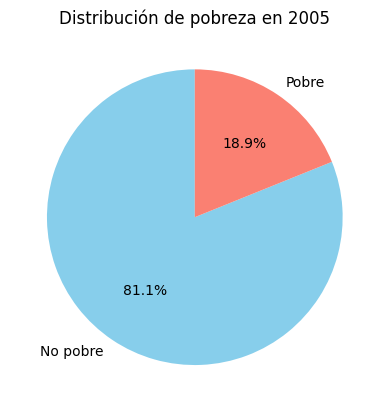

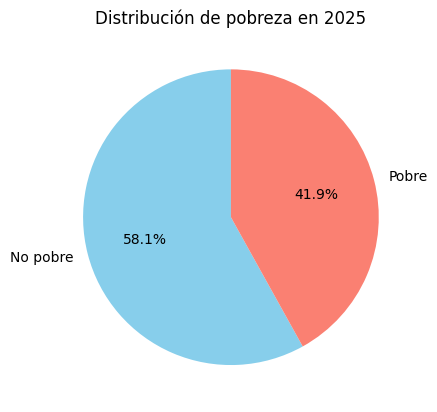

In [ ]:
#Importamos librerias (si no las importamos antes)
import matplotlib.pyplot as plt

# --- GRÁFICOS EXPLORATORIOS: Distribución de la variable "pobre" ---

# Contamos la cantidad de pobres y no pobres para cada año.
counts_2005 = EPH_2005_patagonica["pobre"].value_counts()
counts_2025 = EPH_2025_patagonica["pobre"].value_counts()

# Definimos etiquetas para los gráficos.
labels = ["No pobre", "Pobre"]

# Gráfico de torta para 2005
plt.pie(counts_2005, labels=labels, autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
plt.title("Distribución de pobreza en 2005")
plt.show()

# Gráfico de torta para 2025
plt.pie(counts_2025, labels=labels, autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
plt.title("Distribución de pobreza en 2025")
plt.show()


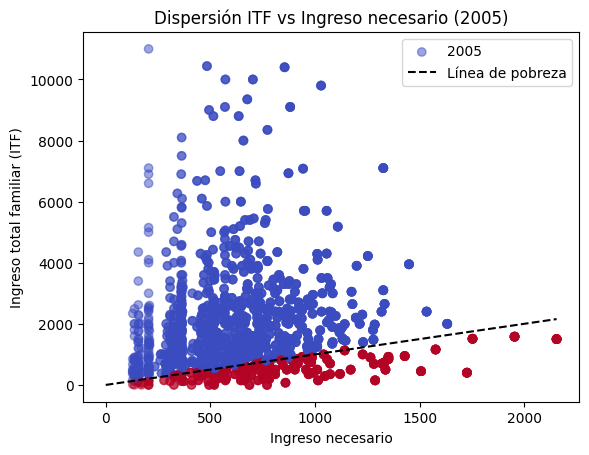

In [ ]:
# --- GRÁFICO 2: DISPERSIÓN (ITF vs ingreso_necesario) ---

# Creamos un scatter plot para 2005, mostrando cada hogar:
# - Eje X: ingreso necesario del hogar
# - Eje Y: ingreso total familiar (ITF)
# - Color: indica si el hogar es pobre (1) o no pobre (0)
# - alpha=0.5 para puntos semi-transparentes
plt.scatter(
    EPH_2005_patagonica["ingreso_necesario"],
    EPH_2005_patagonica["ITF"],
    c=EPH_2005_patagonica["pobre"], cmap="coolwarm", alpha=0.5, label="2005"
)

# Agregamos la línea de referencia donde ITF = ingreso necesario
plt.plot([0, EPH_2005_patagonica["ingreso_necesario"].max()],
         [0, EPH_2005_patagonica["ingreso_necesario"].max()],
         color="black", linestyle="--", label="Línea de pobreza")

# Etiquetas y título
plt.xlabel("Ingreso necesario")
plt.ylabel("Ingreso total familiar (ITF)")
plt.title("Dispersión ITF vs Ingreso necesario (2005)")
plt.legend()
plt.show()

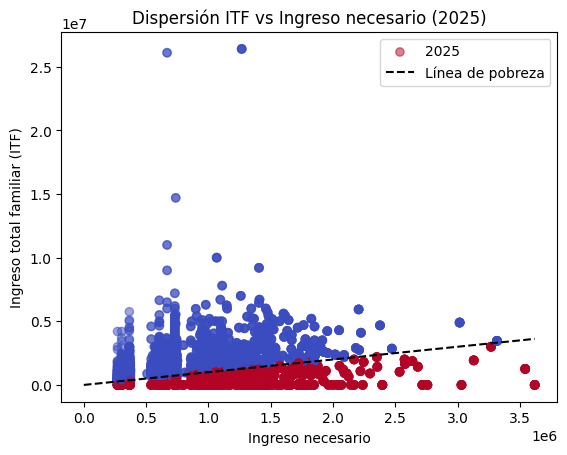

In [ ]:
# --- GRÁFICO 2: DISPERSIÓN (ITF vs ingreso_necesario) para 2025 ---

# Creamos un scatter plot para 2025, mostrando cada hogar:
# - Eje X: ingreso necesario del hogar
# - Eje Y: ingreso total familiar (ITF)
# - Color: indica si el hogar es pobre (1) o no pobre (0)
# - alpha=0.5 para puntos semi-transparentes
plt.scatter(
    EPH_2025_patagonica["ingreso_necesario"],
    EPH_2025_patagonica["ITF"],
    c=EPH_2025_patagonica["pobre"], cmap="coolwarm", alpha=0.5, label="2025"
)

# Agregamos la línea de referencia donde ITF = ingreso necesario
plt.plot([0, EPH_2025_patagonica["ingreso_necesario"].max()],
         [0, EPH_2025_patagonica["ingreso_necesario"].max()],
         color="black", linestyle="--", label="Línea de pobreza")

# Etiquetas y título
plt.xlabel("Ingreso necesario")
plt.ylabel("Ingreso total familiar (ITF)")
plt.title("Dispersión ITF vs Ingreso necesario (2025)")
plt.legend()
plt.show()
